In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comcast-telecom-consumer-complaints/Comcast Telecom Complaints data.csv


In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
df = pd.read_csv("../input/comcast-telecom-consumer-complaints/Comcast Telecom Complaints data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [4]:
df["Customer Complaint"]= df["Customer Complaint"].str.lower()
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,comcast cable internet speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,speed and service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,comcast imposed a new usage cap of 300gb that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
cc = list(df["Customer Complaint"])

In [6]:
def converttostr(input_seq, seperator):
   # Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str
seperator = ' '
cd = converttostr(cc, seperator)

In [7]:
import nltk
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(cd)

In [8]:
from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
newStopWords = ["comcast", ",", ".", "-", "&"]
for i in newStopWords:
    sw.append(i)

In [9]:
filtered_words = [w for w in word_tk if not w in sw]

In [10]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()

In [11]:
stemmed_words = []

for w in filtered_words:
    stemmed_words.append(port_stem.stem(w))


In [12]:
from nltk.probability import FreqDist
fd = FreqDist(stemmed_words)
print(fd)

<FreqDist with 1232 samples and 7011 outcomes>


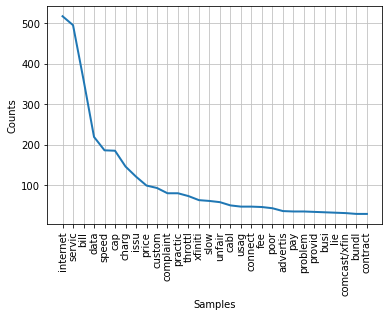

In [13]:
fd.plot(30, cumulative = False)

In [14]:
from PIL import Image # if you don't have it, you'll need to install it
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

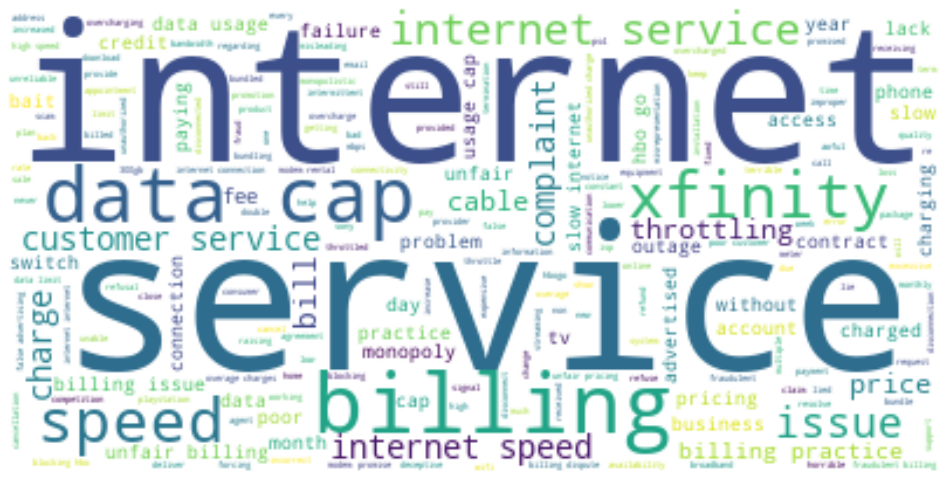

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(["comcast", ",", ".", "-", "&"])
cloud = WordCloud(stopwords=stopwords, background_color='white').generate(cd)


# Display the generated image:
plt.figure(figsize=(13, 10), facecolor=None) 
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
df1 = df.drop(['Customer Complaint'], axis=1)

In [17]:
df1["Status"] = df1["Status"].replace('Solved', 'Closed')
df1["Status"] = df1["Status"].replace('Pending', 'Open')

In [18]:
df1.head(10)

,Ticket #,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No
5,338519,6/12/2015,9:59:40 PM,Internet,Acworth,Georgia,30101,Closed,No
6,361148,24-06-2015,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Open,No
7,359792,23-06-2015,6:56:14 PM,Internet,Adrian,Michigan,49221,Closed,No
8,318072,6/1/2015,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,28-06-2015,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


# Data Visualization

**We will now take a look at some data visualizations perfomred on Tableau Software**

*Figure 1: Map of Complaints per city*

![Map of Complaints per city](https://i.imgur.com/PhE9acB.png)

*Figure 2: Histogram of Complaints per City*

![](https://i.imgur.com/GQrab1q.png)

*Figure 3: Map of Complaints per state*

![Map of Complains per State](https://i.imgur.com/WBkCDdo.png)

*Figure 4: Histogram of Complaints per state*

![](https://i.imgur.com/NydYhlp.png)

*Figure 5: Number of Complaints per Date*

![](https://i.imgur.com/Xij3hcD.png)

*Figure 6: Filling on Behalf, Recieved Via, Closed Status % per State, and Status count of complaints respectively*

![](https://i.imgur.com/0WdkdUD.png)

*Figure 7: Density chart of Complaints per State and Date*

![](https://i.imgur.com/V298K7A.png)

*Figure 7: Box Plot for Complaints per state*

![](https://i.imgur.com/wWsHjBj.png)